Saharsh Jhunjhunwala
<br>
Dexter Dysthe
<br><br>
Dr. Krstovski
<br>
B9340: Natural Language Processing
<br>
13 May 2022

<font size="5"><h1><center>The Impact of FOMC Meeting Documents on 2-Year Treasury Notes </center></h1>

## 1. Introduction
The motivation for our project stems from a paper (https://www.newyorkfed.org/medialibrary/media/research/epr/2013/0913rosa.pdf) written in December 2013 by Carlo Rosa during his tenure as a Senior Economist at the Federal Reserve Bank of New York. The paper investigates the real-time response of various U.S. asset prices and returns to the content contained in Federal Open Market Committee (FOMC) Meeting Minutes between January 2005 and March 2011. However, despite the FOMC Meeting Minutes being text, the paper does not make use of any tools from natural language processing. As a result, the goal of our project is to build on Rosa's work by incorporating natural language processing-based tools in order to study the effect of text-based measures of sentiment and "distance" between consecutive FOMC documents on 2-year Treasury notes (T-Notes) yield changes and volatility. 
<br>

Instead of studying a variety of U.S. asset prices and returns, we focus our attention on 2-year T-Notes, data for which we obtain from the Federal Reserve Economic Data (FRED) database (https://fred.stlouisfed.org/series/DGS2). When we wrote our final project proposal (FPP), we were operating under the assumption that the Center for Research in Security Prices (CRSP) was the best resource for obtaining our securities data; however, as it turns out, FRED is a far superior database, for our purposes, for obtaining data related to Treasury securities, and allows us to easily obtain data at the daily level. 
<br>

As detailed in our FPP, we have three separate corpora corresponding to three different FOMC document types; namely, we have one corpus for FOMC Meeting Minutes, one corpus for FOMC Tealbook A's, and one corpus for FOMC Tealbook B's. In order to account for the potential issues arrising from working with too small a sample, we opted to widen our time window to January 2000 through December 2016; in our FPP, we stated we would work with January 2011 through December 2016. This generates 136 documents in each of the three corpora, far superior to the roughly 40 documents each had we elected to start from January 2011.
<br> 
<br>
Our project naturally splits into two components: 
<br>

**(1)** Use sentiment analysis via (i) a bag-of-words (BOW) and (ii) a Latent Dirichlet Allocation (LDA) approach coupled with the Loughran-McDonald master dictionary in order to study the effect of sentiment of the three FOMC meeting document types on 2-year T-Notes five-day historical and future yield changes and five-day historical and future yield volatility.
<br>

**(2)** Use "distances" between consecutive FOMC meeting documents via (i) a LDA-based vectorization and (ii) a document embedding vectorization approach in order to study the effect of "distance" between conseucutive documents on 2-year T-Notes absolute five-day historical and future yield changes and five-day historial and future yield volatility. 
<br>

*Note: We consider absolute five-day yield changes for (2) given "distances" between consecutive documents will only convey magnitudes but not signs. For (1), given sentiment scores can be positive or negative, we consider non-absolute five-day yield changes.*

We discuss both of these objectives in detail below.

## 1.1: Sentiment Analysis
We consider two approaches to calculating sentiment scores which we describe in detail in the following two subsections. Before constructing both such scores, we apply standard text processing procedures. That is, we tokenize the documents into lists of words, convert all words to lowercase, strip whitespace characters, remove stop words, remove words with non-alphabetical characters, and stem words using the Snowball stemmer. For both of our sentiment scores, we make use of the Loughran-McDonald master dictionary which contains 2,345 negative sentiment words (10 were removed in 2020) and 347 positive sentiment words (7 were removed in 2020). We comment that stemming words is a notably important part of the text processing steps given the sentiment assigned to a word should be invariant under "small" perturbations of the word and we want to account for the Loughran-McDonald dictionary potentially not storing all such perturbations. Since we stem the words in our corpora, we also stem the words residing in the Loughran-McDonald dictionary.

### 1.1.1: BOW Sentiment Scores
Construction of our BOW sentiment scores is very straightforward. Enumerate the documents in each of our three corpora $\left\{D^i_t\right\}_{t\in\{1,\ldots,136\}}$, for $i\in\{1, 2, 3\}$, where $i=1$ denotes the Minutes corpus, $i=2$ denotes the Tealbook A corpus, $i=3$ denotes the Tealbook B corpus, and $t$ is used to order time of publication. Here $D^i_t$ denotes document $t$ in corpus $i$ after the text processing steps described above have been applied. Now, let $p^i_t$ and $n^i_t$ denote the number of words from document $D^i_t$ that are assigned positive and negative sentiment in the Loughran-McDonald dictionary respectively, and let $T^i_t$ denote the total number of words in $D^i_t$. With this, we define the BOW sentiment score for document $D^i_t$ as 

$$ \text{sBOW}^i_t = \frac{p^i_t - n^i_t}{T^i_t} \,.$$

Our goal is to study how the time series $\text{sBOW}^i_1, \ldots, \text{sBOW}^i_{136}$ varies with our sample of 2-year T-Notes for each $i\in\{1,2,3\}$. Before explaining this in detail in section 1.3.1, we first develop our second approach for calculating the sentiment scores of the FOMC meeting documents.

### 1.1.2: LDA Sentiment Scores
Building off the approach described in the previous section, we now develop a natural alternative for calculating sentiment scores via incorporating LDA. For each of our corpora consider running LDA with $K$-many topics where $K$ is a positive integer (in the below code we take $K=12$). Doing so produces a document-topic distribution $P^i_t$ for each document $t$ in corpus $i$; that is, each $P^i_t$ is a discrete probability distribution over the finite set of topics $\{\mathcal{T}^i_1, \ldots, \mathcal{T}^i_K\}$, i.e. $P^i_t(\mathcal{T}^i_k)$ is the probability document $t$ in corpus $i$ is "about" topic $\mathcal{T}^i_k$ for $t\in\{1,\ldots, 136\}$. 

Now, for each topic $\mathcal{T}^i_k\in\{\mathcal{T}^i_1, \ldots, \mathcal{T}^i_K\}$ we calculate a variant of the BOW sentiment score as follows. Let $D^{i,\mathcal{T}_k}_t$ denote the collection of words for topic $\mathcal{T}^i_k$ that are assigned positive probability, and let $p^{i,\mathcal{T}_k}_t$ and $n^{i,\mathcal{T}_k}_t$ denote the sum of the word probabilities — that is, the probabilities ascribed by the topic-word distribution for topic $\mathcal{T}^i_k$ — for those words in $D^{i,\mathcal{T}_k}_t$ with positive and negative sentiment respectively. That is, we collect all words in $D^{i,\mathcal{T}_k}_t$ that are assigned positive sentiment in the Loughran-McDonald dictionary, take the sum of their corresponding probabilities of occurence in topic $\mathcal{T}^i_k$, and call this sum $p^{i,\mathcal{T}_k}_t$. We form $n^{i,\mathcal{T}_k}_t$ analogously for negative sentiment words. With this, we define the LDA sentiment score for document $D^i_t$ as 

$$ \text{sLDA}^i_t = \sum_{k=1}^{K}P^i_t(\mathcal{T}^i_k) \left(p^{i,\mathcal{T}_k}_t - n^{i,\mathcal{T}_k}_t\right) .$$

Note that there is no need to divide $p^{i,\mathcal{T}_k}_t - n^{i,\mathcal{T}_k}_t$ by the total number of words in $D^{i,\mathcal{T}_k}_t$ as $p^{i,\mathcal{T}_k}_t$ and $n^{i,\mathcal{T}_k}_t$ are sums of probabilities, not word frequencies. Like with the BOW sentiment scores, our goal is to study how the time series $\text{sLDA}^i_1, \ldots, \text{sLDA}^i_{136}$ varies with our sample of 2-year T-Notes for each $i\in\{1,2,3\}$. Before describing the regressions we will run, we first discuss the second component of our project which seeks to build "distance" measures between consecutive FOMC meeting documents.

## 1.2: Distance Measures
We think about the "distance" between consecutive FOMC meeting documents as serving as a proxy for shifts in macroeconomic and financial markets conditions that take place between FOMC meetings. That is, a small "distance" between consecutive documents indicates that Fed policy makers are "staying the course" and that there have been few macroeconomic and financial markets environment changes, whereas a large "distance" between consecutive documents captures that their has been a shift in Fed policy discussion due to changing macroeconomic and financial markets conditions since the previous meeting. We propose three methods for calculating the "distance" between consecutive FOMC meeting documents which we discuss in detail below.

### 1.2.1: Kullback-Leibler Divergence

Enumerate the documents in each of our three corpora $\left\{D^i_t\right\}_{t\in\{1,\ldots,136\}}$, for $i\in\{1, 2, 3\}$, where $i=1$ denotes the Minutes corpus, $i=2$ denotes the Tealbook A corpus, $i=3$ denotes the Tealbook B corpus, and $t$ is used to order time of publication. Two documents in the same corpus $D^i_t$ and $D^i_s$ are said to be consecutive if $t=s-1$ or $t=s+1$. 

Now, for each of our corpora consider running LDA with $K$-many topics where $K$ is a positive integer (in the below code we take $K=12$). We adopt the same notation as used in section 1.1.2 above.

The Kullback-Leibler (KL) divergence of $P^i_{t+1}$ from $P^i_t$ is defined as 

$$D_{\text{KL}}(P^i_{t+1}\,\lVert \,P^i_t) = \sum_{k=1}^{K} P^i_{t+1}(\mathcal{T}^i_k) \ln\left(\frac{P^i_{t+1}(\mathcal{T}^i_k)}{P^i_t(\mathcal{T}^i_k)}\right)\quad.$$ 

For notational simplicity we put $\text{KL}^i_{t+1} = D_{\text{KL}}(P^i_{t+1}\,\lVert \,P^i_t)$. A mathematical requirement for the KL divergence to be well-defined is that if $P^i_t(\mathcal{T}^i_k)=0$ then $P^i_{t+1}(\mathcal{T}^i_k)=0$, i.e. $P^i_{t+1}$ is absolutely continuous with respect to $P^i_t$. Given we will use the Gensim library to run our LDAs, topic probabilities will be set to zero if they are below a small threshold; thus, we very well may encounter the case that $P^i_t(\mathcal{T}_k)=0$ but $P^i_{t+1}(\mathcal{T}_k)>0$. To handle this, we propose modifying the defintion of the KL divergence to

$$\text{KL}^i_{t+1} = \sum_{k=1}^{K} P^i_{t+1}(\mathcal{T}^i_k) \biggl|\, \ln\left(\frac{P^i_{t+1}(\mathcal{T}^i_k) + 10^{-5}}{P^i_t(\mathcal{T}^i_k) + 10^{-5}}\right) \,\biggr| \quad,$$

where we take the absolute value of the log to ensure that the modified divergence is nonnegative. There are of course more robust ways of handling the issue of lacking absolute continuity, and the negativity of divergence it can cause, however, given the scope of this project, we only consider the methodology given above. To state one alternative, we could, for each document, multiply all of the nonzero topic probabilities by 0.95 and then allocate the leftover mass of 0.05 uniformly to those topics which are assigned zero probability. 

We use $\text{KL}^i_{t+1}$ to gauge how "far away" the document-topic distribution of $D^i_{t+1}$ is from the document-topic distribution of $D^i_t$. As done with our sentiment scores discussed in 1.1, our ultimate goal is to study how the time series $\text{KL}^i_2, \ldots, \text{KL}^i_{136}$ varies with our sample of 2-year T-Notes for each $i\in\{1, 2, 3\}$. Before expanding on exactly how we plan to accomplish this in section 1.3.2 below, we first discuss our other two constructions for measuring the "distance" between consecutive FOMC documents.

### 1.2.2: Sentiment-adjusted Kullback-Leibler Divergence
Recall from 1.2.1 that the (prior to adjustment) KL divergence from $P^i_t$ to $P^i_{t+1}$ is given by

$$\text{KL}^i_{t+1} = \sum_{k=1}^{K} P^i_{t+1}(\mathcal{T}^i_k) \ln\left(\frac{P^i_{t+1}(\mathcal{T}^i_k)}{P^i_t(\mathcal{T}^i_k)}\right)$$

where $i$ indexes our corpora — $i=1$ for the Minutes, $i=2$ for the Tealbook A's, and $i=3$ for the Tealbook B's — and $t$ indexes documents. See that $\text{KL}^i_{t+1}$ is simply the expected value of the random variable $\ln\left(\frac{P^i_{t+1}}{P^i_t}\right)$ with respect to the probability distribution $P^i_{t+1}$. A discrete distribution can naturally be regarded as a random variable via $P(\omega) := P(X(\omega)) = \mathbb{P}(X = X(\omega))$, where $X$ is a discrete random variable with mass function $P$; we include this soley to avoid confusion on part of the reader. That is, we can write

$$\text{KL}^i_{t+1} = \mathbb{E}^{P^i_{t+1}}\left[\ln\left(\frac{P^i_{t+1}}{P^i_t}\right)\right],$$

which gives us a natural path to generalizing how we measure the "distance" between consecutive FOMC documents. We write $S^i$ for the random variable defined on the set of topics $\{\mathcal{T}^i_1,\ldots, \mathcal{T}^i_K\}$ such that $S^i(\mathcal{T}^i_k)$ represents the sentiment score for topic $\mathcal{T}^i_k$ as defined in 1.1.2, and we let $\text{med}(S^i)$ denote the median of $\{S^i(\mathcal{T}^i_1), \ldots, S^i(\mathcal{T}^i_K)\}$. With this, we define the sentiment-adjusted KL divergence from $P^i_t$ to $P^i_{t+1}$ as

$$\text{SKL}^i_{t+1} = \mathbb{E}^{P^i_{t+1}}\left[\biggl|\frac{S^i}{\text{med}(S^i)}\biggr|\,\ln\left(\frac{P^i_{t+1}}{P^i_t}\right)\right] = \sum_{k=1}^{K} P^i_{t+1}(\mathcal{T}^i_k)\,\biggl|\frac{S^i(\mathcal{T}^i_k)}{\text{med}(S^i)}\biggr|\, \ln\left(\frac{P^i_{t+1}(\mathcal{T}^i_k)}{P^i_t(\mathcal{T}^i_k)}\right)\quad ,$$

where for the same reasons as described in 1.2.2 we make the modification to ensure the absolute continuity condition and nonnegativity of the divergence, i.e.

$$\text{SKL}^i_{t+1} = \sum_{k=1}^{K} P^i_{t+1}(\mathcal{T}^i_k)\,\biggl|\frac{S^i(\mathcal{T}^i_k)}{{\text{med}(S^i)}} \ln\left(\frac{P^i_{t+1}(\mathcal{T}^i_k) + 10^{-5}}{P^i_t(\mathcal{T}^i_k) + 10^{-5}}\right)\biggr | \quad .$$

Our reasoning for considering the sentiment-adjusted KL divergence is that financial markets likely react more excessively to those topics with relatively high or low sentiment than those with relatively neutral sentiment. Thus, for neutral-sentiment topics — that is, topics where $\bigl|S^i(\mathcal{T}^i_k)\bigr|$ is below the absolute value of the median — we downweight the $P^i_{t+1}(\mathcal{T}^i_k)\ln\left(\frac{P^i_{t+1}(\mathcal{T}^i_k) + 10^{-5}}{P^i_t(\mathcal{T}^i_k) + 10^{-5}}\right)$ component of the divergence. Thus, even when $P^i_{t+1}(\mathcal{T}^i_k)$ is significantly different from $P^i_t(\mathcal{T}^i_k)$, we do not allow this difference to meaningfully affect the sentiment-adjusted KL divergence given topic $\mathcal{T}^i_k$ is of neutral sentiment and consequently should not indicate a substantial difference from document $D^i_t$ to document $D^i_{t+1}$ from the point of view of market participants. 

Conversely, for high and low sentiment topics — that is, topics where $\bigl|S^i(\mathcal{T}^i_k)\bigr|$ is larger than the absolute value of the median — we scale up the $P^i_{t+1}(\mathcal{T}^i_k)\ln\left(\frac{P^i_{t+1}(\mathcal{T}^i_k) + 10^{-5}}{P^i_t(\mathcal{T}^i_k) + 10^{-5}}\right)$ component of the divergence. When the difference between $P^i_t(\mathcal{T}^i_k)$ and $P^i_{t+1}(\mathcal{T}^i_k)$ is small, the sentiment-adjustment has little effect; however, in the case that the difference between the topic $\mathcal{T}^i_k$ probabilities for consecutive documents is substantial, the sentiment-adjustment will magnify the divergence from document $D^i_t$ to document $D^i_{t+1}$. This captures the fact that if the probability of a high or low sentiment topic changes significantly between consecutive documents, there has likely been a seismic change in FOMC policy thus producing a large swing in 2-year T-Notes yield levels.

We comment that we of course could very easily change the median to the mean, 85th percentile, etc. for the cutoff at which we say a topic is of neutral or positive/negative sentiment. We opted for the median given the nature of the distribution for the topic-wise sentiment scores. Indeed, after taking absolute values, the distribution was positively skewed with clustering at and just in excess of the median; as a result, even the 55th percentile excluded only 2-3 topics and in turn we did not want the sentiment-adjusted KL divergence to be primarily driven by so few topics.

As mentioned at the end of the previous section, our ultimate goal is to study how the time series $\text{SKL}^i_2, \ldots, \text{SKL}^i_{136}$ varies with our sample of 2-year T-Notes for each $i\in\{1,2,3\}$. This will be discussed further in section 1.3.2 below.

### 1.2.3: Document Embeddings with doc2vec
We propose one final approach for calculating the "distance" between consecutive FOMC meeting documents. Throughout our course, the quintessential approach we took for vectorizing documents was to utilize a BOW approach. While the BOW encoding of a document is attractive for the ease with which it can be implemented, there are two major weaknesses: (i) the sequential nature of the document is lost, that is, the ordering of words is forgotten and (ii) semantics of the words are not accounted for. While a bag of n-grams approach, which was briefly discussed in our course, does partially remedy (i) by taking into account the context of words, it suffers from clear dimensionality issues and ultimately is unable to properly capture semantics. Thus, to overcome these pitfalls, Quoc Le and Tomas Mikolov developed the algorithm Paragraph Vector in their 2014 paper *Distributed Representations of Sentences and Documents* (https://arxiv.org/pdf/1405.4053.pdf) published in PMLR. Their algorithm has come to be popularly known as doc2vec, the name stemming from the fact that Paragraph Vector was inspired by the development of word2vec. Like word2vec does with words, Paragraph Vector represents documents using dense vectors, which, as shown in the aforementioned paper, leads to state-of-the-art performance on a variety of NLP related tasks.

As with word2vec, where one can train the word embeddings based on predicting words from an input context (CBOW) or predicting context from an input word (Skip-gram), there are two modelling frameworks for implementing document embeddings with doc2vec:

**(1) Distributed Memory (PV-DM)**: PV-DM is analogous to CBOW in the sense that it takes as input a paragraph (document) ID and a set of randomly sampled context words from the paragraph (document) and correspondingly predicts the target word. That is, DM predicts words from an input context which consists of an ID for the paragraph (document) and a window of words sampled from the paragraph (document). 

**(2) Distributed Bag of Words (DBOW)**: DBOW is analogous to Skip-gram in the sense that the context window is ignored as an input, and instead the model infers context conditioned on the paragraph (document) ID and a target word as input. That is, DBOW predicts the context of a target word from an input which consists of an ID for the paragraph (document) and the given target word.

We have made the decision to not provide detailed explanations of how these two algorithms are implemented, and instead refer the readers to the aforementioned paper for a more complete treatment. 

We will compute our document embeddings for each document in our three corpora (implementation will be done separately for the Minutes, Tealbook A's, and Tealbook B's) using the Gensim library's Doc2Vec class. Gensim allows us to specify whether we wish to build our embeddings using either PV-DM or DBOW, and indeed we will consider both such implementations for comparison purposes. For document $D^i_t$ let $v^{\text{PV-DM}}_{i,t}\in\mathbb{R}^m$ and $v^{\text{DBOW}}_{i,t}\in\mathbb{R}^m$ denote its PV-DM and DBOW document embedding vectors respectively, where $m$ is a positive integer which denotes the selected dimension of the embedding space. We will adopt the standard convention of setting $m$ equal to 300. 

Our ultimate goal is to use these embedding vectors to create a notion of "distance" between consecutive FOMC meeting documents in each of our three corpora. In this case, we can drop the quotations from distance as we will simply utilize the Euclidean distances between the document embedding vectors. That is, we set 

$$\text{PV-DM}^i_{t+1} = \lVert v^{\text{PV-DM}}_{i,t+1} - v^{\text{PV-DM}}_{i,t} \rVert_2$$

and

$$\text{DBOW}^i_{t+1} = \lVert v^{\text{DBOW}}_{i,t+1} - v^{\text{DBOW}}_{i,t} \rVert_2 $$

where $\Vert u - w \rVert_2 = \sqrt{\sum_{j=1}^{300}(u_j - w_j)^2} \;$ for $u=(u_1,\ldots,u_{300}), w=(w_1,\ldots,w_{300})\in\mathbb{R}^{300}$.

## 1.3: Regression Analysis
Now that we have detailed the constructions of our six text-based variables of interests, we are ready to discuss the regressions we plan to run using these variables. We run two types of regressions, one set using our sentiment scores as independent variables and another using our distance measures as independent variables, and we consider four different dependent variables for each class. To obtain the data necessary to construct our dependent variables, we download 2-year T-Notes yield data from https://fred.stlouisfed.org/series/DGS2. Let $\{y_\tau\}$ denote the corresponding time series of daily yields, with $\tau$ ranging over all trading days between January 3rd, 2000 and December 30th, 2016 for which FRED has data available (only roughly 30 days have missing data). Using these data we build the following six time series:

**(1) Five-day historical volatility**: $$\sigma^{\text{hist}}_\tau = \frac{1}{2}\sqrt{\sum_{n=0}^{4}\left(y_{\tau-n} - \left(\frac{1}{5}\sum_{m=0}^{4}y_{\tau-m}\right)\right)^2}$$

**(2) Five-day future volatility**: $$\sigma^{\text{fut}}_\tau = \frac{1}{2}\sqrt{\sum_{n=0}^{4}\left(y_{\tau+n} - \left(\frac{1}{5}\sum_{m=0}^{4}y_{\tau+m}\right)\right)^2}$$

**(3) Five-day historical yield change**: $$\text{YC}^{\text{hist}}_\tau = y_\tau - y_{\tau-4}$$

**(4) Five-day future yield change**: $$\text{YC}^{\text{fut}}_\tau = y_{\tau+4} - y_\tau$$

**(5) Five-day historical absolute yield change**: $$\text{AYC}^{\text{hist}}_\tau = \bigl|y_\tau - y_{\tau-4}\bigr| $$

**(6) Five-day future absolute yield change**: $$\text{AYC}^{\text{fut}}_\tau = \bigl|y_{\tau+4} - y_\tau\bigr| $$

We will use **(1)** and **(2)** for both the regressions involving our sentiment scores and distance measures, however, we will use **(3)** and **(4)** only for our sentiment score regressions and **(5)** and **(6)** only for our distance measure regressions. We refer the reader to the note at the end of Section 1, before the start of subsection 1.1, as to why we do this.

*Note: We use $\tau$ instead of $t$ as we did in the previous sections as $t$ belonged to $\{1, \ldots, 136\}$ and was simply used as an ordering for the three FOMC document types given the Minutes, Tealbook A's, and Tealbook B's are published on different dates whereas $\tau$ indexes actual dates.* 

### 1.3.1: Regression Analysis with Sentiment Scores
Recall that we denote our two sentiment scores by $\text{sBOW}^i_t$ and $\text{sLDA}^i_t$ where $i=1$ corresponds to the Minutes corpus, $i=2$ the Tealbook A's corpus, and $i=3$ the Tealbook B's corpus. Now, given our dataframe of T-Notes data will contain far more dates than our three dataframes of sentiment scores, we will left merge the Excel of T-Notes data on each of our three (Minutes, Tealbook A, and Tealbook B) sentiment dataframes. The row indices of our sentiment dataframes will correspond to the dates of publication, and thus, the left merge will ensure we have the related T-Notes data only on the dates of publication for each of the three FOMC meeting document types. We thus will use $t_i$ as our time indexing variable — the $i$ encodes the dependence on the corpus type since the Minutes, Tealbook A's, and Tealbook B's are published on slighty different dates. We will estimate the following regression models for each $i\in\{1,2,3\}$:

**(1)**: $\quad \sigma^{\text{hist}}_{t_i} = \alpha_1 + \beta_1 \text{sBOW}^i_{t_i} + \varepsilon^1_{t_i} \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$ **(1')**: $\quad \sigma^{\text{hist}}_{t_i} = \alpha_{1'} + \beta_{1'} \text{sLDA}^i_{t_i} + \varepsilon^{1'}_{t_i}$

**(2)**: $\quad \sigma^{\text{fut}}_{t_i} = \alpha_2 + \beta_2 \text{sBOW}^i_{t_i} + \varepsilon^2_{t_i} \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad \;$ **(2')**: $\quad \sigma^{\text{fut}}_{t_i} = \alpha_{2'} + \beta_{2'} \text{sLDA}^i_{t_i} + \varepsilon^{2'}_{t_i}$

**(3)**: $\quad \text{YC}^{\text{hist}}_{t_i} = \alpha_3 + \beta_3 \text{sBOW}^i_{t_i} + \varepsilon^3_{t_i} \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad \;\,$ **(3')**: $\quad \text{YC}^{\text{hist}}_{t_i} = \alpha_{3'} + \beta_{3'} \text{sLDA}^i_{t_i} + \varepsilon^{3'}_{t_i}$

**(4)**: $\quad \text{YC}^{\text{fut}}_{t_i} = \alpha_4 + \beta_4 \text{sBOW}^i_{t_i} + \varepsilon^4_{t_i} \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;\;\,$ **(4')**: $\quad \text{YC}^{\text{fut}}_{t_i} = \alpha_{4'} + \beta_{4'} \text{sLDA}^i_{t_i} + \varepsilon^{4'}_{t_i}$

### 1.3.2: Regression Analysis with Distance Measures
Recall that we denote our four distance measures by $\text{KL}^i_t$,$\,$ $\text{SKL}^i_t$,$\,$ $\text{PV-DM}^i_t$,$\,$ and$\,$ $\text{DBOW}^i_t,\,$ where $t\in\{2,\ldots,136\}$. As stated in 1.3.1, given our dataframe of T-Notes data will contain far more dates than our three dataframes of distance measures, we will left merge the Excel of T-Notes data with each of our three (Minutes, Tealbook A, and Tealbook B) distance measures dataframes. As with our sentiment dataframes, the row indices of our distance measures dataframes will correspond to the dates of publication, and thus, the left merge will ensure we have the related T-Notes data on the dates of publication. As with the sentiment scores regressions, we use $t_i$ as our time indexing variable. We will estimate the following regression models for each $i\in\{1,2,3\}$:

<font size="2">**(1)**: $\sigma^{\text{hist}}_{t_i} = \gamma_1 + \phi_1 \text{KL}^i_{t_i} + \nu^1_{t_i} \quad\,\,\,$ **(1')**: $ \sigma^{\text{hist}}_{t_i} = \gamma_{1'} + \phi_{1'} \text{SKL}^i_{t_i} + \nu^{1'}_{t_i} \quad\,\,\,$ **(1'')**: $\sigma^{\text{hist}}_{t_i} = \gamma_{1''} + \phi_{1''} \text{PV-DM}^i_{t_i} + \nu^{1''}_{t_i} \quad\,\,\,\,$ **(1''')**: $ \sigma^{\text{hist}}_{t_i} = \gamma_{1'''} + \phi_{1'''} \text{DBOW}^i_{t_i} + \nu^{1'''}_{t_i}$ 
<br><br>

<font size="2">**(2)**: $\sigma^{\text{fut}}_{t_i} = \gamma_2 + \phi_2 \text{KL}^i_{t_i} + \nu^2_{t_i} \quad\;\,\,\,$ **(2')**: $ \sigma^{\text{fut}}_{t_i} = \gamma_{2'} + \phi_{1'} \text{SKL}^i_{t_i} + \nu^{2'}_{t_i} \quad\;\,\,$ **(2'')**: $\sigma^{\text{fut}}_{t_i} = \gamma_{2''} + \phi_{1''} \text{PV-DM}^i_{t_i} + \nu^{2''}_{t_i} \quad\;\,\,\,$ **(2''')**: $ \sigma^{\text{fut}}_{t_i} = \gamma_{2'''} + \phi_{1'''} \text{DBOW}^i_{t_i} + \nu^{2'''}_{t_i}$ 
<br><br>

<font size="2">**(3)**: $\text{AYC}^{\text{hist}}_{t_i} = \gamma_3 + \phi_3 \text{KL}^i_{t_i} + \nu^3_{t_i} \;$ **(3')**: $ \text{AYC}^{\text{hist}}_{t_i} = \gamma_{3'} + \phi_{3'} \text{SKL}^i_{t_i} + \nu^{3'}_{t_i} \;$ **(3'')**: $\text{AYC}^{\text{hist}}_{t_i} = \gamma_{3''} + \phi_{3''} \text{PV-DM}^i_{t_i} + \nu^{3''}_{t_i} \;$ **(3''')**: $ \text{AYC}^{\text{hist}}_{t_i} = \gamma_{3'''} + \phi_{3'''} \text{DBOW}^i_{t_i} + \nu^{3'''}_{t_i}$ 
<br><br>

<font size="2">**(4)**: $\text{AYC}^{\text{fut}}_{t_i} = \gamma_4 + \phi_4 \text{KL}^i_{t_i} + \nu^4_{t_i} \;\,$ **(4')**: $ \text{AYC}^{\text{fut}}_{t_i} = \gamma_{4'} + \phi_{4'} \text{SKL}^i_{t_i} + \nu^{4'}_{t_i} \;\,$ **(4'')**: $\text{AYC}^{\text{fut}}_{t_i} = \gamma_{4''} + \phi_{4''} \text{PV-DM}^i_{t_i} + \nu^{4''}_{t_i} \;\,$ **(4''')**: $ \text{AYC}^{\text{fut}}_{t_i} = \gamma_{4'''} + \phi_{4'''} \text{DBOW}^i_{t_i} + \nu^{4'''}_{t_i}$

## 2. Code

In [1]:
import os
import csv
import pdfplumber

import string
from bs4 import BeautifulSoup

import itertools
import collections
from collections import namedtuple

from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem.snowball import SnowballStemmer

import gensim
from gensim.models import Doc2Vec
import statsmodels.api as sm


stopwords_list = nltk.corpus.stopwords.words('english')
snow_stemmer = SnowballStemmer(language='english')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Preprocessing of textual data  

In [2]:
# Function to read pdf collections using pdfplumber

# Parameter: Path to the pdf file
# Return   : Text content of the file 

def get_pdf_text(pdf_fn):
    pdf = pdfplumber.open(pdf_fn)
    complete_text = ""
    for i in range(len(pdf.pages)):
        page = pdf.pages[i]
        try:
            complete_text += page.extract_text()
        except:
            continue
    return complete_text

In [3]:
# Function to extract text from each file in a folder of files. 

# Parameter : Path to the folder of files to be read
# Return    : (1) A list of file names in the folder 
#             (2) A dictionary containing filename as keys and file content as value

def text_extractor(path):
    count = 0
    
    text_dict = {}
    filename = []
    
    for file_name in os.listdir(path):
        
        # Reading all the files in the specified location using the get_pdf_text function
        text = get_pdf_text(os.path.join(path, file_name))
        sentences = nltk.sent_tokenize(text)

        #Removing new line characters
        sentences = [sentence.replace("\n"," ") for sentence in sentences ]
        filename.append(file_name)
        text_dict[file_name] = (' '.join(sentences)).lower()
    
    return text_dict, filename

In [4]:
# Function to preprocess text data read from the pdfs. It tokenizes the text and removes stopwords, punctuations and 
# words with non-aplhabetical characters.

# Parameter : Dictionary returned from text_extractor function
# Return    : A dictionary containg filename as keys and  list of processed words from the documents as values.  

def text_PreProcessor(art_dict):
    
    translator=str.maketrans('','',string.punctuation + "’–‘")
    return_dict = {}
    for file_name, file_text in art_dict.items():
        
        sentences = nltk.sent_tokenize(file_text)
        tokenized_article = []
        for sentence in sentences:

            # Removing stopwords, punctuations and words with non-alphabetical characters using .split(" ") method
            # The remaining words are rejoined with a space to be processed by nltk.word_tokenize
            split_words = sentence.split(" ")
            split_words = [word.translate(translator).lower() for word in split_words if len(word.translate(translator))>0]
            split_words = [word for word in split_words if word not in stopwords_list and word.isalpha()]
            joined_sent = (" ").join(split_words)

            # Removing stopwords, single character tokens using nltk tokenize:
            sent_tok = nltk.word_tokenize(joined_sent)
            sent_tok = [word.lower() for word in sent_tok if word.lower() not in stopwords_list and len(word) > 1 
                        and word.isalpha()]

            # Create a list of all tokenized words across all sentences:
            for word in sent_tok:
                # A final punctuation removel cleaning step is further applied to remove any punctuations missed by 
                # tokenization
                word = word.lower()
                word = word.translate(translator)
                tokenized_article.append(word)
        
        # Saving the list of words generated by every file in a dictionary format 
        return_dict[file_name] = tokenized_article
        
    return return_dict

In [5]:
# Function to stem a list of words using snowball stemmer

# Parameter : Dictionary returned from text_preprocessor function
# Return    : A dictionary with filename as keys and stemmed, processed words as values

def stemmer(dict_of_texts):
    
    stemmed_text = {}
    for key, value in dict_of_texts.items():
        list_of_words = value
        stemmed_words = [snow_stemmer.stem(el) for el in list_of_words] # Stemming each word using snowbal stemmer
        
        stemmed_text[key] = stemmed_words
    
    return stemmed_text

In [6]:
# Processing text from the minutes folder using above defined functions

minutes = {}
minutes_filename = []

# Path to the Minutes folder
collection = "/user/sj3119/Desktop/Homeworks/NLP/Project/Final Project/Minutes"

# Extracting text from files in the minutes folder using the text_extractor function
minutes, minutes_filename = text_extractor(collection)

# Preprocessing and stemming the extracted text using the text_Preprocessor and stemmer functions 
minutes_preprocessed = text_PreProcessor(minutes)
minutes_processed = stemmer(minutes_preprocessed)

In [7]:
# Processing text from the TealbookA folder using above defined functions

TealbookA = {}
TealbookA_filename = []

# Path to the TealbookA folder
collection = "/user/sj3119/Desktop/Homeworks/NLP/Project/Final Project/TealbookA"

# Extracting text from files in TealbookA folder using the text_extractor function
TealbookA, TealbookA_filename = text_extractor(collection)

# Preprocessing and stemming the extracted text using the text_Preprocessor and stemmer functions
TealbookA_preprocessed = text_PreProcessor(TealbookA)
TealbookA_processed = stemmer(TealbookA_preprocessed)

In [8]:
# Processing text from the TealbookB folder using above defined functions

TealbookB = {}
TealbookB_filename = []

# Path to the TealbookB folder
collection = "/user/sj3119/Desktop/Homeworks/NLP/Project/Final Project/TealbookB"

# Extracting text from all the files in the TealbookB folder using the text_extractor function
TealbookB, TealbookB_filename = text_extractor(collection)

# Preprocessing and stemming the extracted text using the text_Preprocessor and stemmer functions
TealbookB_preprocessed = text_PreProcessor(TealbookB)
TealbookB_processed = stemmer(TealbookB_preprocessed)

## Sentiment analysis of the processed textual data

In [9]:
# Reading the Loughran-McDonald dictionary and stemming the words in the dictionary for use in sentiment score analysis

# Importing the functions needed to read the excel dictionary from sentiment_dictionary.py(file from Loughran-McDonald
# website)
from sentiment_dictionary import *

# Name of the excel dictionary file
md = 'Loughran-McDonald_MasterDictionary_1993-2021.csv'

# Loading the dictionary using load_masterdictionary function contained in sentiment_dictionary.py
sentiment_dict = load_masterdictionary(md)

# Generating the list of positive and negative sentiment from sentiment_dict
post_sent = list(sentiment_dict['positive'].keys())
neg_sent = list(sentiment_dict['negative'].keys())

# Stemming the words in post_sent and neg_sent which contain postive sentiment and negative sentiment words respectively
post_sent = [snow_stemmer.stem(el.lower()) for el in post_sent]
neg_sent = [snow_stemmer.stem(el.lower()) for el in neg_sent]

#### 1. BOW Sentiment Scores

In [10]:
# Function to calculate the BOW sentiment score, for every document, using the lists of words stored in the dictionary 
# created after applying the stemmer function. The function also converts the file names to datetime and outputs a  
# dataframe of sentiment scores with datetime as the index

# Parameter : Dictionary of words generated from the stemmer function
# Return    : A dataframe, indexed using publish-date of a document, with a column for document sentiment score 

def sentiment_score(dict_of_articles):
    
    sent_score = []
    filename = []
    sent_score_df = pd.DataFrame()
    
    for key,value in dict_of_articles.items():
        list_of_words = value
        
        # Counting the number of positive sentiment words and negative sentiment words in the list of words using the 
        # Loughran McDonald word dictionary and dividing each of the 2 numbers by the total number of words
        positive_sent = (len([el for el in list_of_words if el in post_sent])/len(list_of_words))
        negative_sent = len([el for el in list_of_words if el in neg_sent])/len(list_of_words)

        score = positive_sent - negative_sent # Calculating the sentiment score using the formula provided in writeup
        
        sent_score.append(score) # Storing the sentiment score in the list sent_score
        filename.append(key) # Storing the filename of the corresponding sentiment score in the list filename
        
    # Converting the file names to dates
    date_time = [datetime.strptime(el[:-4], '%m%d%Y') for el in filename]
    
    # Generating a dataframe with columns for sentiment scores and datetime computed from filename 
    sent_score_df['datetime'] = date_time
    sent_score_df['sent_score'] = sent_score
    
    # Sorting the dataframe using the datetime column
    sent_score_df.sort_values(by=['datetime'], inplace=True)
    
    # Setting the datetime as the index of the dataframe
    sent_score_df.set_index('datetime', inplace=True)
    
    return sent_score_df

In [11]:
# Generating the BOW sentiment score for documents in each of the 3 repositories

# Calculating the sentiment of each document in the minutes folder using the sentiment_score function
minutes_sentiment_bow = sentiment_score(minutes_processed)

# Calculating the sentiment of each document in the TealbookA folder using the sentiment_score function
TealbookA_sentiment_bow = sentiment_score(TealbookA_processed)

# Calculating the sentiment of each document in the TealbookB folder using the sentiment_score function
TealbookB_sentiment_bow = sentiment_score(TealbookB_processed)

#### 2. LDA Sentiment Scores

(a) Using LDA model to first generate document-wise topic-probability distribution 

In [12]:
# Function to train an LDA model on a corpus of text data

# Parameter : (1) Dictionary generated by the stemmer function
#             (2) number of topics 
# Return    : (1) A trained lda object 
#             (2) A document-wise topic-probability distribution array

def training_LDA(dict_of_text, number_of_topics):
    
    topic_dictionary = gensim.corpora.Dictionary(dict_of_text.values())
    corpus = [topic_dictionary.doc2bow(doc) for doc in dict_of_text.values()]
    
    num_topics = number_of_topics
    passes = 100
    iterations = 400
    eval_every = None
    update_every = 0
    
    # Training the LDA model
    lda = gensim.models.LdaModel(
        corpus=corpus,
        id2word=topic_dictionary, 
        alpha='auto',
        eta='auto',
        iterations=iterations,
        num_topics=num_topics,
        passes=passes,
        eval_every=eval_every,
    update_every = update_every)
    
    # Generating the document-wise topic-probability distribution array
    get_document_topics = [lda.get_document_topics(item) for item in corpus]
    
    return lda, get_document_topics

In [13]:
# Generating LDA models for the documents in each of the 3 folders

number_of_topics = 13

# Training the minutes lda model
minutes_lda, get_doc_topics_minutes = training_LDA(minutes_processed, number_of_topics)

# Training the TealbookA lda model
TealbookA_lda, get_doc_topics_TealbookA = training_LDA(TealbookA_processed, number_of_topics)

# Training the TealbookB lda model
TealbookB_lda, get_doc_topics_TealbookB = training_LDA(TealbookB_processed, number_of_topics)

In [14]:
# Function to generate a document-topic probability distribution dataframe, with topics in columns and dates from 
# doc_name as row indices. Every cell corresponds to the probility of occurrence of the topic, in the cell column name,  
# in the document corresponding to the row of the cell. 

# Parameter : (1) A list of file names
#             (2) Document-topic probability distribution array generated by the training_LDA function
# Return    : (1) A dataframe of document-wise topic-probability distribution

def df_generator(list_filename, get_doc_topic):
    
    # Generating standard column names
    column_names = ['Topic'+str(i) for i in range(number_of_topics)]
    
    # Initializing a dataframe
    doc_topic_prob_df = pd.DataFrame(np.nan, columns = column_names, index = list_filename)
    
    # Filling the dataframe with document-topic probability distribution for each file in the list of filenames
    for i in range(len(list_filename)):
        doc_top_prob = get_doc_topic[i]

        # Accesing the topic number and document-topic probability for each of the documents
        for item in doc_top_prob: 
            topic_num = item[0]
            topic_probability = item[1]
            
            # Assigning values to the df
            doc_topic_prob_df['Topic'+str(topic_num)].loc[list_filename[i]] = topic_probability 
    
    # Filling the nan values with 0 as the get_doc_topics object only return topics with non-zero probability for each 
    # document
    doc_topic_prob_df.fillna(0, inplace=True)
    
    # Converting the file names to dates 
    date_time = [datetime.strptime(el[:-4], '%m%d%Y') for el in list_filename]
    
    # Creating a datetime column in the dataframe
    doc_topic_prob_df['datetime'] = date_time
    
    # Sorting the dataframe by datetime
    doc_topic_prob_df.sort_values(by=['datetime'], inplace=True)
    
    # Setting the datetime column as index
    doc_topic_prob_df.set_index('datetime', inplace=True)
    
    return doc_topic_prob_df

In [15]:
# Generating document topic-distribution dataframe for the 3 repositories

minutes_top_prob = df_generator(minutes_filename, get_doc_topics_minutes)

TealbookA_top_prob = df_generator(TealbookA_filename, get_doc_topics_TealbookA)

TealbookB_top_prob = df_generator(TealbookB_filename, get_doc_topics_TealbookB)

________________________________________________________________________________

(b) Computing the LDA sentiment scores for each document using the document-topic probability distribution

In [17]:
# Function to calculate the sentiment score of each topic generated from LDA analysis of files in a folder

# Parameters : Trained LDA object generated by training_LDA function
# Return     : A pandas series of topic-wise sentiment

def topic_sentiment(lda):
    
    # Generating the matrix of topic-word probabilities where columns correspond to words and rows correspond to topics 
    topics_terms = lda.state.get_lambda()
    topics_terms_prob = np.apply_along_axis(lambda x: x/x.sum(),1,topics_terms)
    
    # Converting the matrix to a DataFrame
    index_names = ['Topic'+str(i) for i in range(len(topics_terms))]
    topic_word_sent = pd.DataFrame(topics_terms_prob, columns= lda.id2word.values(), index = index_names)
    
    # Computing the sentiment
    for word in lda.id2word.values():
        word_sentiment = 0 # Sentiment if word is neutral
        if word in post_sent: 
            word_sentiment = 1 # Sentiment if word is positive
        elif word in neg_sent:
            word_sentiment = -1 # Sentiment if word is negative
            
        topic_word_sent[word] = topic_word_sent[word]*word_sentiment # Multiplying the word column with word sentiment
        
    topic_sent = topic_word_sent.sum(axis=1) # summing across rows to get the total weighted sentiment
    
    return topic_sent

In [18]:
# Calculating topic sentiments for minutes_lda 
minutes_topic_sentiment = topic_sentiment(minutes_lda)

# Calculating topic sentiments for TealbookA_lda
TealbookA_topic_sentiment = topic_sentiment(TealbookA_lda)

# Calculating topic sentiments for TealbookB_lda
TealbookB_topic_sentiment = topic_sentiment(TealbookB_lda)

In [19]:
# Calculating the LDA sentiment score of each document by summing over the multiplication of document-wise topic probability
# distribution rows with topic-wise sentiment series   

# Generating LDA sentiments for the files in minutes
minutes_sentiment_LDA = (minutes_top_prob*minutes_topic_sentiment).sum(axis=1)

# Generating LDA sentiments for the files in TealbookA
TealbookA_sentiment_LDA = (TealbookA_top_prob*TealbookA_topic_sentiment).sum(axis=1)

# Generating LDA sentiments for the files in TealbookB
TealbookB_sentiment_LDA = (TealbookB_top_prob*TealbookB_topic_sentiment).sum(axis=1)

_______________________________________________________________________________________________________________________________

In [20]:
# Creating a dataframe for each folder with both BOW and LDA sentiment scores

minutes_sentiment = pd.DataFrame()
TealbookA_sentiment = pd.DataFrame()
TealbookB_sentiment = pd.DataFrame()

minutes_sentiment['s_BOW'] = minutes_sentiment_bow
minutes_sentiment['s_LDA'] = minutes_sentiment_LDA

TealbookA_sentiment['s_BOW'] = TealbookA_sentiment_bow
TealbookA_sentiment['s_LDA'] = TealbookA_sentiment_LDA

TealbookB_sentiment['s_BOW'] = TealbookB_sentiment_bow
TealbookB_sentiment['s_LDA'] = TealbookB_sentiment_LDA

In [82]:
minutes_sentiment.head()

,s_BOW,s_LDA
datetime,,
2000-02-02,-0.003802,-0.009123
2000-03-21,0.004351,-0.010441
2000-05-16,-0.006322,-0.010936
2000-06-28,-0.012528,-0.010945
2000-08-22,-0.009036,-0.010988


In [81]:
TealbookA_sentiment.head()

,s_BOW,s_LDA
datetime,,
2000-01-27,-0.005915,-0.011297
2000-03-15,-0.005456,-0.010303
2000-05-11,-0.007125,-0.009749
2000-06-21,-0.012389,-0.009666
2000-08-16,-0.008129,-0.011731


In [80]:
TealbookB_sentiment.head()

,s_BOW,s_LDA
datetime,,
2000-01-28,-0.015993,-0.020697
2000-03-17,-0.010223,-0.021158
2000-05-12,-0.017864,-0.021271
2000-06-23,-0.021940,-0.021158
2000-08-18,-0.021277,-0.021157


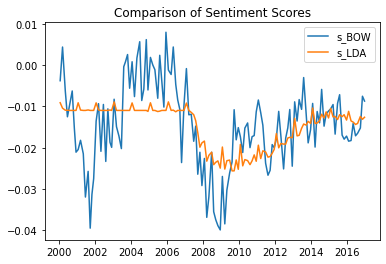

In [84]:
# Plotting the minutes_sentiment corresponding to s_BOW and s_LDA

plt.plot(minutes_sentiment['s_BOW'])
plt.plot(minutes_sentiment['s_LDA'])
plt.legend(['s_BOW', 's_LDA'])
plt.title("Comparison of Sentiment Scores")
plt.show()

## Computing Distance Measures

#### 1. Kullback-Leibler divergence

In [24]:
# Function to calculate Kullback-Leibler divergence

# Parameter : A dataframe of document-wise topic-probability distribution generated by df_generator function
# Return    : A pandas series of kl divergence between consecutive documents

def kullback_leibler(top_prob):
    
    # Calculated using the formula mentioned in the writeup
    kl_divergence = ((top_prob.shift(1)) * (abs(np.log(((top_prob + 0.00001).shift(1))/(top_prob + 0.00001))))).sum(axis=1)
    
    return kl_divergence

In [25]:
# Computing the minutes_kl_divergence 
minutes_kl_divergence = kullback_leibler(minutes_top_prob)

# Computing the TealbookA_kl_divergence
TealbookA_kl_divergence = kullback_leibler(TealbookA_top_prob)

# Computing the TealbookB_kl_divergence
TealbookB_kl_divergence = kullback_leibler(TealbookB_top_prob)

#### 2. Sentiment adjusted Kullback-Leibler divergence

In [27]:
# Function to calculate sentiment-adjusted Kullback-Leibler divergence

# Parameter : (1) A dataframe of document-wise topic-probability distribution generated by df_generator function
#             (2) A pandas series of topic-wise sentiment score generated by topic_sentiment function
# Return    : A pandas series of sentiment adjusted kl divergence between consecutive documents

def sentadj_kullback_leibler(top_prob, topic_sent):
    
    # Calculated using the formula mentioned in the writeup
    
    # Calculating the kl_divergence terms
    kl_divergence = ((top_prob.shift(1)) * (abs(np.log(((top_prob + 0.0000001).shift(1))/(top_prob + 0.0000001)))))
    # Multiplying the absolute value of topic sentiment(normalized using median) with kl divergence terms 
    skl_divergence = (kl_divergence*(abs(topic_sent)/((abs(topic_sent)).median()))).sum(axis=1)
    
    return skl_divergence

In [28]:
# Computing the minutes_kl_divergence 
minutes_skl_divergence = sentadj_kullback_leibler(minutes_top_prob, minutes_topic_sentiment)

# Computing the TealbookA_kl_divergence
TealbookA_skl_divergence = sentadj_kullback_leibler(TealbookA_top_prob, TealbookA_topic_sentiment)

# Computing the TealbookB_kl_divergence
TealbookB_skl_divergence = sentadj_kullback_leibler(TealbookB_top_prob, TealbookB_topic_sentiment)

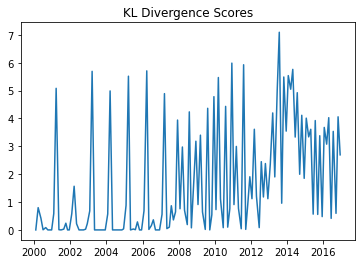

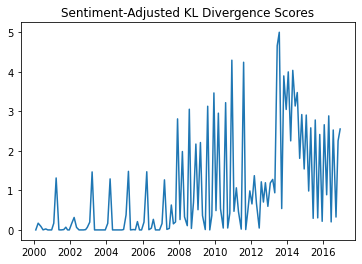

In [88]:
# Plotting the kl and skl divergences

plt.plot(minutes_kl_divergence)
plt.title("KL Divergence Scores")
plt.show()

plt.plot(minutes_skl_divergence)
plt.title("Sentiment-Adjusted KL Divergence Scores")
plt.show()

#### 3. Document embeddings with Doc2Vec

In [30]:
# Function to create the doc2vec dataframe

# Parameter : Dictionary generated by the stemmer function
# Return    : (1) PVDM distance vector dataframe
#             (2) DBOW distance vector dataframe

def doc2vec(processed_dict):
    
    # Accessing the keys and values from the procssed dictionary 
    file_name = list(processed_dict.keys())
    file_words = list(processed_dict.values())
    
    # Covertinf filename to datetime
    date_time = [datetime.strptime(el[:-4], '%m%d%Y') for el in file_name]
    
    # Creating a new dictionary with keys as datetime
    datetime_dict = dict(zip(date_time, file_words))
    
    # Sorting the dictionary using keys
    ordered_datetime_dict = dict(collections.OrderedDict(sorted(datetime_dict.items())))
    
    # Using the ordered dictionary to create the doc2vec vector
    analyzedDocument = namedtuple('AnalyzedWord', 'words tags')
    docs = list()
    
    for date, text in ordered_datetime_dict.items():    
        tags = [date]
        docs.append(analyzedDocument(text, tags))
    
    # Generating the document embedding vectors according to both Distributed Memory and Distributed Bag-of-Words 
    # using Gensim
    # *Note: min_count = 1 ignores hapax words
    model_pvdm = Doc2Vec(docs, dm=1, vector_size=300, window=20, min_count=1, workers=4)
    model_dbow = Doc2Vec(docs, dm=0, vector_size=300, window=20, min_count=1, workers=4)
    
    return model_pvdm.docvecs, model_dbow.docvecs

In [31]:
# Computing doc2vec vectors for minutes_processed
minutes_pvdm, minutes_dbow = doc2vec(minutes_processed)

# Computing doc2vec vectors for TealbookA_processed
TealbookA_pvdm, TealbookA_dbow = doc2vec(TealbookA_processed)

# Computing doc2vec vectors for TealbookB_processed
TealbookB_pvdm, TealbookB_dbow = doc2vec(TealbookB_processed)

/tmp/6715908.1.large.q/ipykernel_13596/2100300335.py:35: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  return model_pvdm.docvecs, model_dbow.docvecs


In [32]:
# Function to compute the pair-wise euclidean distance between consecutive document embedding vectors calculated in previous
# cell where consecutive is as defined in the write-up subsection 1.2.1

# Parameters : list of vectors created by doc2vec function
# Return     : pair wise euclidean distance between consequtive vectors 

def euclidean_distance(list_of_vectors):
    
    vectors = [list_of_vectors[i] for i in range(len(list_of_vectors))]
    distance_vector = np.diff(vectors, axis=0)
    distance = np.sqrt((distance_vector ** 2).sum(axis=1))
    
    return distance

In [33]:
# Calculating the 2 distance metrics for minutes folder
minutes_pvdm_distance = euclidean_distance(minutes_pvdm)
minutes_dbow_distance = euclidean_distance(minutes_dbow)

# Calculating the 2 distance metrics for TealbookA folder
TealbookA_pvdm_distance = euclidean_distance(TealbookA_pvdm)
TealbookA_dbow_distance = euclidean_distance(TealbookA_dbow)

# Calculating the 2 distance metrics for TealbookB folder
TealbookB_pvdm_distance = euclidean_distance(TealbookB_pvdm)
TealbookB_dbow_distance = euclidean_distance(TealbookB_dbow)

_______________________________________________________________________________________________________________________________

In [34]:
# Function to create a dataframe for each folder which includes KL_div, SKL_div, pvdm_distance, dbow_distance for each 
# file in folder 

def dist_df_generator(kl_div, skl_div, pvdm_distance, dbow_distance):
    
    df = pd.DataFrame()
    df['kl_div'] = kl_div[1:]
    df['skl_div'] = skl_div[1:]
    df['pvdm_dist'] = pvdm_distance
    df['dbow_dist'] = dbow_distance
    
    return df

In [35]:
# Generating the datafram for minutes folder
minutes_distance = dist_df_generator(minutes_kl_divergence, minutes_skl_divergence, minutes_pvdm_distance, minutes_dbow_distance)

# Generating the datafram for TealbookA folder
TealbookA_distance = dist_df_generator(TealbookA_kl_divergence, TealbookA_skl_divergence, TealbookA_pvdm_distance, TealbookA_dbow_distance)

# Generating the datafram for TealbookB folder
TealbookB_distance = dist_df_generator(TealbookB_kl_divergence, TealbookB_skl_divergence, TealbookB_pvdm_distance, TealbookB_dbow_distance)

In [77]:
minutes_distance.head()

,kl_div,skl_div,pvdm_dist,dbow_dist
datetime,,,,
2000-03-21,0.799097,0.170769,6.279603,2.155903
2000-05-16,0.418526,0.087299,6.087953,1.422561
2000-06-28,0.004640,0.001075,5.501508,1.567591
2000-08-22,0.083349,0.024756,5.175399,1.527351
2000-10-03,0.000009,0.000003,4.978217,1.490780


In [78]:
TealbookA_distance.head()

,kl_div,skl_div,pvdm_dist,dbow_dist
datetime,,,,
2000-03-15,0.100169,0.075470,9.102190,1.743623
2000-05-11,0.228799,0.245951,9.703362,1.797388
2000-06-21,0.428228,0.435388,8.974598,1.927949
2000-08-16,0.196696,0.108124,9.379135,1.788553
2000-09-27,0.234620,0.129349,10.002398,2.132004


In [79]:
TealbookB_distance.head()

,kl_div,skl_div,pvdm_dist,dbow_dist
datetime,,,,
2000-03-17,0.584294,0.468157,12.441442,4.007257
2000-05-12,0.024385,0.019962,7.086219,1.816576
2000-06-23,0.211485,0.318129,10.090996,3.182932
2000-08-18,0.000040,0.000033,8.068481,3.175870
2000-09-29,0.000003,0.000002,5.688002,1.335948


## Regression Analysis

In [39]:
# Function to run our regressions

# Parameters : (1) Independent variable(s)
#              (2) Dependent variable
# Return     : Output of regression

def regression(x, y):
    X = sm.add_constant(x)
    
    model = sm.OLS(y, X)
    results = model.fit()
    
    return results

#### 1. Regression analysis with sentiment scores

In [40]:
# Reading the excel file for sentiment regression
fred_sent = pd.read_excel("two_yr_tnotes_sentscores.xls")
fred_sent.set_index('date', inplace =True)

# Left merge FRED excel on sentiment dataframes 
minutes_sent_regression = minutes_sentiment.merge(fred_sent, left_index=True, right_index=True)
TealbookA_sent_regression = TealbookA_sentiment.merge(fred_sent, left_index=True, right_index=True)
TealbookB_sent_regression = TealbookB_sentiment.merge(fred_sent, left_index=True, right_index=True)

In [41]:
# Creating tuples of valid regressor and regressand column names

dependent_regressor_tags = ['fiveday_historical_vol', 'fiveday_future_vol', 'fiveday_historical_yc', 'fiveday_future_yc']
s_BOW_tuples = [('s_BOW', el) for el in dependent_regressor_tags]
s_LDA_tuples = [('s_LDA', el) for el in dependent_regressor_tags]

(a) Regression using s_BOW as the independent variable

In [42]:
# Regressions using minutes_sent_regression
minutes_sBOW_result = [regression(minutes_sent_regression[item[0]], minutes_sent_regression[item[1]]) for item in s_BOW_tuples]

# Regressions using TealbookA_sent_regression
TealbookA_sBOW_result = [regression(TealbookA_sent_regression[item[0]], TealbookA_sent_regression[item[1]]) for item 
                         in s_BOW_tuples]

# Regressions using TealbookB_sent_regression
TealbookB_sBOW_result = [regression(TealbookB_sent_regression[item[0]], TealbookB_sent_regression[item[1]]) for item 
                         in s_BOW_tuples]

/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# # Printing minutes - s_BOW regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for s_BOW as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(minutes_sBOW_result[i].summary())

In [ ]:
# # Printing TealbookA - s_BOW regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for s_BOW as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(TealbookA_sBOW_result[i].summary())

In [ ]:
# # Printing TealbookB - s_BOW regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for s_BOW as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(TealbookB_sBOW_result[i].summary())

_______________________________

(b) Regression using s_LDA as the independent variable

In [43]:
# Regressions using minutes_sent_regression
minutes_sLDA_result = [regression(minutes_sent_regression[item[0]], minutes_sent_regression[item[1]]) for item in s_LDA_tuples]

# Regressions using TealbookA_sent_regression
TealbookA_sLDA_result = [regression(TealbookA_sent_regression[item[0]], TealbookA_sent_regression[item[1]]) for item 
                         in s_LDA_tuples]

# Regressions using TealbookB_sent_regression
TealbookB_sLDA_result = [regression(TealbookB_sent_regression[item[0]], TealbookB_sent_regression[item[1]]) for item 
                         in s_LDA_tuples]

In [ ]:
# # Printing minutes - s_LDA regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for s_LDA as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(minutes_sLDA_result[i].summary())

In [ ]:
# # Printing TealbookA - s_LDA regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for s_LDA as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(TealbookA_sLDA_result[i].summary())

In [ ]:
# # Printing TealbookB - s_LDA regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for s_LDA as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(TealbookB_sLDA_result[i].summary())

#### 2. Regression analysis with distance measures 

In [44]:
# Reading the excel files for distance regressions

fred_dist = pd.read_excel("two_yr_tnotes_distmeasures.xls")
fred_dist.set_index('date', inplace =True)

minutes_dist_regression = minutes_distance.merge(fred_dist, left_index=True, right_index=True)

TealbookA_dist_regression = TealbookA_distance.merge(fred_dist, left_index=True, right_index=True)

TealbookB_dist_regression = TealbookB_distance.merge(fred_dist, left_index=True, right_index=True)

In [45]:
# Creating tuples of valid regressor and regrassand column names

dependent_regressor_tags = ['fiveday_historical_vol', 'fiveday_future_vol', 'fiveday_historical_ayc', 'fiveday_future_acm']
kl_div_tuples = [('kl_div', el) for el in dependent_regressor_tags]
skl_div_tuples = [('skl_div', el) for el in dependent_regressor_tags]
pvdm_dist = [('pvdm_dist', el) for el in dependent_regressor_tags]
dbow_dist = [('dbow_dist', el) for el in dependent_regressor_tags]

(a) Regression using kl_div as the independent variable

In [46]:
# Regressions using minutes_dist_regression
minutes_kldiv_result = [regression(minutes_dist_regression[item[0]], minutes_dist_regression[item[1]]) for item 
                        in kl_div_tuples]

# Regressions using TealbookA_dist_regression
TealbookA_kldiv_result = [regression(TealbookA_dist_regression[item[0]], TealbookA_dist_regression[item[1]]) for item 
                         in kl_div_tuples]

# Regressions using TealbookB_dist_regression
TealbookB_kldiv_result = [regression(TealbookB_dist_regression[item[0]], TealbookB_dist_regression[item[1]]) for item 
                         in kl_div_tuples]

In [65]:
# # Printing minutes - kl_div regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for kl_div as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(minutes_kldiv_result[i].summary())

In [66]:
# # Printing TealbookA - kl_div regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for kl_div as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(TealbookA_kldiv_result[i].summary())

In [67]:
# # Printing TealbookB - kl_div regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for kl_div as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(TealbookB_kldiv_result[i].summary())

______________________

(b) Regression using skl_div as the independent variable

In [50]:
# Regressions using minutes_dist_regression
minutes_skldiv_result = [regression(minutes_dist_regression[item[0]], minutes_dist_regression[item[1]]) for item in skl_div_tuples]

# Regressions using TealbookA_dist_regression
TealbookA_skldiv_result = [regression(TealbookA_dist_regression[item[0]], TealbookA_dist_regression[item[1]]) for item 
                         in skl_div_tuples]

# Regressions using TealbookB_dist_regression
TealbookB_skldiv_result = [regression(TealbookB_dist_regression[item[0]], TealbookB_dist_regression[item[1]]) for item 
                         in skl_div_tuples]

/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [68]:
# # Printing minutes - skl_div regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for skl_div as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(minutes_skldiv_result[i].summary())

In [69]:
# # Printing TealbookA - skl_div regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for skl_div as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(TealbookA_skldiv_result[i].summary())

In [70]:
# # Printing TealbookB - skl_div regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for skl_div as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(TealbookB_skldiv_result[i].summary())

__________________________________________

(c) Regression using PVDM distance as independent variable

In [55]:
# Regressions using minutes_dist_regression
minutes_pvdm_result = [regression(minutes_dist_regression[item[0]], minutes_dist_regression[item[1]]) for item in pvdm_dist]

# Regressions using TealbookA_dist_regression
TealbookA_pvdm_result = [regression(TealbookA_dist_regression[item[0]], TealbookA_dist_regression[item[1]]) for item 
                         in pvdm_dist]

# Regressions using TealbookB_dist_regression
TealbookB_pvdm_result = [regression(TealbookB_dist_regression[item[0]], TealbookB_dist_regression[item[1]]) for item 
                         in pvdm_dist]

/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [71]:
# # Printing minutes - pvdm_dist regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for pvdm_dist as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(minutes_pvdm_result[i].summary())
#     print(minutes_pvdm_result[i].params)

In [72]:
# # Printing TealbookA - pvdm_dist regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for pvdm_dist as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(TealbookA_pvdm_result[i].summary())

In [73]:
# # Printing TealbookB - pvdm_dist regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for pvdm_dist as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(TealbookB_pvdm_result[i].summary())

_________________________

(d) Regression using DBOW distance as independent variable

In [61]:
# Regressions using minutes_dist_regression
minutes_dbow_result = [regression(minutes_dist_regression[item[0]], minutes_dist_regression[item[1]]) for item in dbow_dist]

# Regressions using TealbookA_dist_regression
TealbookA_dbow_result = [regression(TealbookA_dist_regression[item[0]], TealbookA_dist_regression[item[1]]) for item 
                         in dbow_dist]

# Regressions using TealbookB_dist_regression
TealbookB_dbow_result = [regression(TealbookB_dist_regression[item[0]], TealbookB_dist_regression[item[1]]) for item 
                         in dbow_dist]

/apps/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [74]:
# # Printing minutes - dbow_dist regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for dbow_dist as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(minutes_dbow_result[i].summary())

In [75]:
# # Printing TealbookA - dbow_dist regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for dbow_dist as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(TealbookA_dbow_result[i].summary())

In [76]:
# # Printing TealbookB - dbow_dist regression results. See output tables in Conclusion section.

# for i in range(len(dependent_regressor_tags)):
#     print("The regression results for dbow_dist as independent variable and "+dependent_regressor_tags[i]+" as dependent variable:")
#     print(TealbookB_dbow_result[i].summary())

## 3. Conclusion
In each of the below tables, the row indices denote the dependent variables from each of the above stated regression models and the column indices denote the independent variables. Note that from the above, each regression includes only one predictor, thus, for example, the entry in the row $\sigma^{\text{hist}}$ with column $\text{sLDA}$ denotes the estimated coefficient found from regressing $\sigma^{\text{hist}}$ on $\text{sLDA}$ and a constant (we do not include the estimated intercepts). As is standard, *** denotes significance at the 0.1% level, ** significance at the 1% level, and * significance at the 5% level. The values in parenthesis denote the OLS standard errors for the represented coefficient.

### 3.1: Sentiment Scores

| FOMC Minutes | $\text{sBOW}$ | $\text{sLDA}$ |
| --- | --- | --- |
| $\sigma^{\text{hist}}$ | -0.8152***<br>(0.233) | -1.4174***<br>(0.382) |
| $\sigma^{\text{fut}}$ | -0.8790**<br>(0.282) | -1.5259***<br>(0.463) |
| $\text{YC}^{\text{hist}}$ | 2.5489***<br>(0.727) | 4.5897***<br>(1.187) |
| $\text{YC}^{\text{fut}}$ | -0.9661<br>(0.865) | -1.7777<br>(1.424) |

| FOMC Tealbook A | $\text{sBOW}$ | $\text{sLDA}$ |
| --- | --- | --- |
| $\sigma^{\text{hist}}$ | 0.26510<br>(0.341) | 3.4118***<br>(0.606) |
| $\sigma^{\text{fut}}$ | -0.0703<br>(0.332) | 3.1965***<br>(0.592) |
| $\text{YC}^{\text{hist}}$ | -0.1205<br>(1.124) | -1.9044<br>(2.210) |
| $\text{YC}^{\text{fut}}$ | 1.6705<br>(0.928) | 0.4968<br>(1.850) |

| FOMC Tealbook B | $\text{sBOW}$ | $\text{sLDA}$ |
| --- | --- | --- |
| $\sigma^{\text{hist}}$ | -2.0518***<br>(0.250) | -2.8378***<br>(0.295) |
| $\sigma^{\text{fut}}$ | -1.9126***<br>(0.275) | -2.5937***<br>(0.333) |
| $\text{YC}^{\text{hist}}$ | 1.3064<br>(0.903) | 1.6007<br>(1.131) |
| $\text{YC}^{\text{fut}}$ | 1.3998<br>(1.015) | 2.0078<br>(1.268) |

Our main takeaways from our sentiment scores regressions are the following: 
<br>
**(i)** The LDA-based sentiment scores outperform the BOW sentiment scores across all three document types on average. Given the BOW sentiment scores represent the standard approach, our results indicate that LDA-based sentiment scores should be explored in other corpora to evaluate their broad-based performance. Not only are the LDA-based sentiment scores more statistically significant on average, the coefficients are also larger magnitudes.
<br>
**(ii)** The FOMC Minutes and Tealbook B's deliver expected results for the volatility regressions; that is, an increase in the sentiment score of an FOMC document should on average produce a decrease in "local" volatility. However, the FOMC Tealbook A regressions yield a different narrative; namely, a one-unit increase in the LDA-based sentiment score leads to "local" volatility that is more than 3 percentage points higher, a magnitude that exceeds that of the corresponding decrease in "local" volatility estimated by the Minutes and Tealbook B regressions. The economic rationale for this conclusion is not immediately clear to us.

### 3.2: Distance Measures

| FOMC Minutes | $\text{KL}$ | $\text{SKL}$ | $\text{PV-DM}$ | $\text{DBOW}$ |
| --- | --- | --- | --- | --- |
| $\sigma^{\text{hist}}$ | -0.0024<br>(0.001) | -0.0046*<br>(0.002) | -0.0022<br>(0.002) | -0.0052<br>(0.003) |
| $\sigma^{\text{fut}}$ | -0.0043**<br>(0.001) | -0.0055*<br>(0.002) | -0.0033<br>(0.002) | -0.0105**<br>(0.003) |
| $\text{AYC}^{\text{hist}}$ | -0.0023<br>(0.003) | -0.0072<br>(0.004) | -0.0015<br>(0.003) | -0.0012<br>(0.006) |
| $\text{AYC}^{\text{fut}}$ | -0.0084**<br>(0.003) | -0.0097*<br>(0.005) | -0.002810<br>(0.004) | -0.0142*<br>(0.007) |

| FOMC Tealbook A | $\text{KL}$ | $\text{SKL}$ | $\text{PV-DM}$ | $\text{DBOW}$ |
| --- | --- | --- | --- | --- |
| $\sigma^{\text{hist}}$ | -0.0013<br>(0.001) | -0.0019<br>(0.001) | -0.0051***<br>(0.001) | -0.0053*<br>(0.002) |
| $\sigma^{\text{fut}}$ | -0.0024*<br>(0.001) | -0.0027**<br>(0.001) | -0.0060***<br>(0.001) | -0.0082***<br>(0.002) |
| $\text{AYC}^{\text{hist}}$ | -0.0035<br>(0.002) | -0.0045*<br>(0.002) | -0.012***<br>(0.003) | -0.0103<br>(0.005) |
| $\text{AYC}^{\text{fut}}$ | -0.0037<br>0.002) | -0.0039*<br>(0.002) | -0.0081***<br>(0.002) | -0.0108*<br>(0.004) |

| FOMC Tealbook B | $\text{KL}$ | $\text{SKL}$ | $\text{PV-DM}$ | $\text{DBOW}$ |
| --- | --- | --- | --- | --- |
| $\sigma^{\text{hist}}$ | 0.0188<br>(0.01) | 0.0265**<br>(0.009) | 0.0019<br>(0.002) | 0.0121***<br>(0.003) |
| $\sigma^{\text{fut}}$ | 0.0023<br>(0.011) | 0.0096<br>(0.009) | 0.0028<br>(0.002) | 0.0119***<br>(0.004) |
| $\text{AYC}^{\text{hist}}$ | 0.0173<br>(0.021) | 0.0324<br>(0.019) | 0.0013<br>(0.004) | 0.0203**<br>(0.007) |
| $\text{AYC}^{\text{fut}}$ | 0.0038<br>(0.024 | 0.0225)<br>(0.021) | 0.004966<br>(0.004) | 0.0222**<br>(0.008) |

Our main takeaways from our distance measures regressions are the following: 
<br>
**(i)** The sentiment-adjusted KL divergence is a more significant regressor than the non-sentiment-adjusted KL divergence across all three document types on average (except for the Minutes where the non-sentiment-adjusted KL divergence is marginally superior)
<br>
**(ii)** The doc2vec-based distance measures perform significantly better than both divergence measures for the Tealbooks, with the PV-DM doc2vec implementation achieving significance at the 0.1%  level for all dependent variables for Tealbook A and the DBOW implementation achieving significance at or better than the 1% level for all dependent variables for Tealbook B.
<br>
**(iii)** There is a disagreement in the sign of the effects across the three document types, with the Minutes and Tealbook A regressions indicating that an increase in the "distance" between consecutive documents leads to a decrease in our dependent variables, whereas the Tealbook B regressions produce the more expected result that an increase in the "distance" between consecutive documents produces an increase in our dependent variables.